In [1]:
#I'll begin by importing the dataset and the required Python libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the dataset
df = pd.read_csv("F:\PythonLearning\Projects\customer_acquisition_data.csv")
df = df.dropna(how='any')

In [3]:
df

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


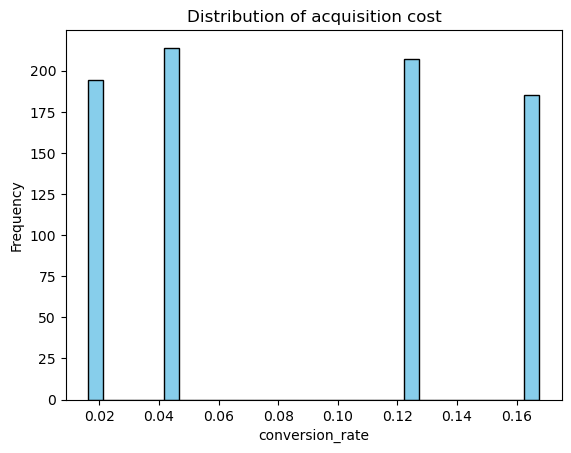

In [5]:
# Create the histogram
plt.hist(df['conversion_rate'], bins=30, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of acquisition cost')
plt.xlabel('conversion_rate')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

Let's begin by utilizing histograms to visualize the distribution of the customer's revenue and acquisition cost.

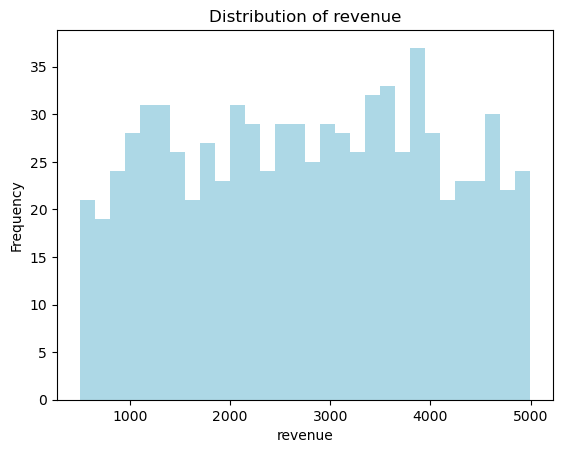

In [6]:
# Create the histogram
plt.hist(df['revenue'], bins=30, color='lightblue')

# Customize the plot
plt.title('Distribution of revenue')
plt.xlabel('revenue')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

Let's evaluate the cost of acquisition across several channels now to see which ones are the most and least profitable.

In [7]:
# Cost by each channel
cost_by_channel = df.groupby('channel')['cost'].sum()

In [12]:
cost_by_channel

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


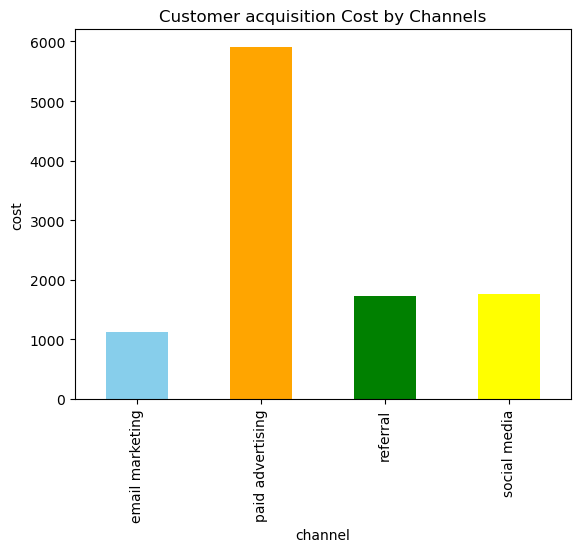

In [8]:
#define a list of colors for each channel

color_list = ['skyblue', 'orange', 'green','yellow']
cost_by_channel.plot(kind='bar', color=color_list)

# set axis labels
plt.xlabel('channel')
plt.ylabel('cost')

# set title
plt.title('Customer acquisition Cost by Channels')

plt.show()

Email marketing is the least expensive route, while paid advertising is the most expensive. Let's examine the channels that convert clients the best and worse now:

In [9]:
# Conversion Rate by each channel
conversion_by_channel = df.groupby('channel')['conversion_rate'].mean()

In [46]:
conversion_by_channel

channel
email marketing     0.043822
paid advertising    0.016341
referral            0.123145
social media        0.167592
Name: conversion_rate, dtype: float64

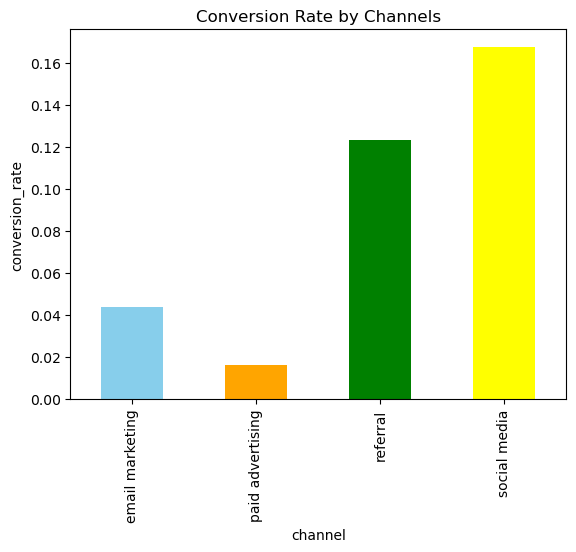

In [10]:
color_list = ['skyblue', 'orange', 'green','yellow']
conversion_by_channel.plot(kind='bar', color=color_list)

# set axis labels
plt.xlabel('channel')
plt.ylabel('conversion_rate')

# set title
plt.title('Conversion Rate by Channels')

plt.show()

Paid advertising is the least successful form of converting clients, whereas social media is the most effective. Let's now determine the total revenue by channel and examine the most and least successful channels in terms of bringing in money:

In [11]:
# Revenue by each channel
revenue_by_channel = df.groupby('channel')['revenue'].sum()

In [112]:
revenue_by_channel

channel
email marketing     604706
paid advertising    548396
referral            569552
social media        492667
Name: revenue, dtype: int64

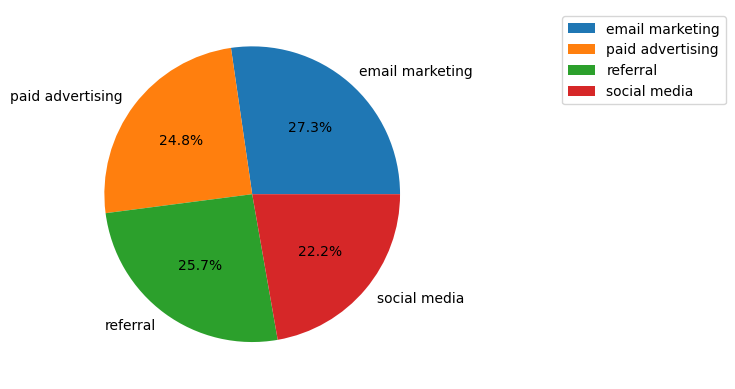

In [12]:
channels = ["email marketing", "paid advertising", "referral", "social media"]

plt.pie(x = revenue_by_channel, labels=channels,autopct='%1.1f%%')
plt.legend(loc='upper right', bbox_to_anchor=(1.8,1))
plt.show()

Therefore, when it comes to bringing in money, email marketing is the most effective channel. However, there isn't a significant enough variation in the rates at which each channel generates income to designate any one of them as the least profitable.

Let's now determine each channel's return on investment (ROI):

In [13]:
# Calculate Return on Investment
df['roi'] = df['revenue']/df['cost']

In [17]:
df['roi']

0      4190.679673
1      3379.549673
2      3158.753737
3      1510.453674
4      2410.679673
          ...     
795    2803.453674
796    3433.753737
797    2091.453674
798     782.549673
799    4814.753737
Name: roi, Length: 800, dtype: float64

In [14]:
#Return on Investment 
roi_by_channel = df.groupby('channel')['roi'].mean()

In [45]:
roi_by_channel

channel
email marketing     2820.482709
paid advertising    2796.333178
referral            2743.138610
social media        2653.518539
Name: roi, dtype: float64

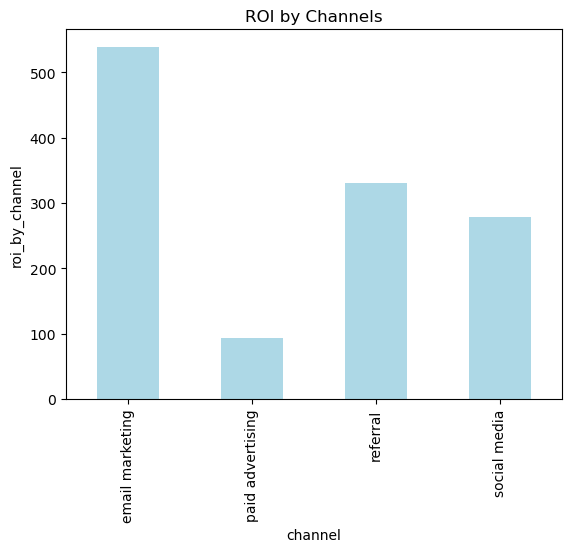

In [15]:
roi_by_channel.plot(kind='bar', color='lightblue')

# set axis labels
plt.xlabel('channel')
plt.ylabel('roi_by_channel')

# set title
plt.title('ROI by Channels')

plt.show()

While paid advertising has the lowest ROI of all the channels, email marketing has a significantly greater ROI than the others. Let's now determine the lifetime value of each channel's customers. We can compute CLTV using the following formula based on the information we currently have:

In [16]:
# Customer Lifetime Value Analysis
df['CLTV'] = (df['revenue'] - df['cost'])* df['conversion_rate']/df['cost']

In [17]:
channel_cltv = df.groupby('channel')['CLTV'].mean()

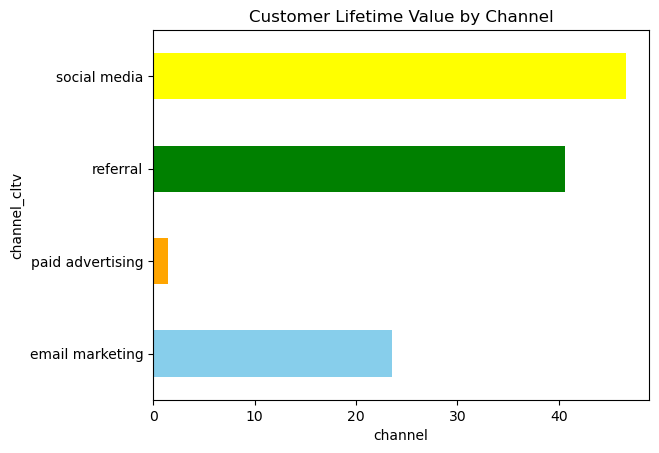

In [18]:
channels = df['channel'].tolist()
color_list = ['skyblue', 'orange', 'green','yellow']
channel_cltv.plot.barh(color=color_list)

# set axis labels
plt.xlabel('channel')
plt.ylabel('channel_cltv')

# set title
plt.title('Customer Lifetime Value by Channel')
plt.show()

Therefore, social media and referral channels have the highest client lifetime value.

The CLTV distributions of the social media and referral channels will now be compared:

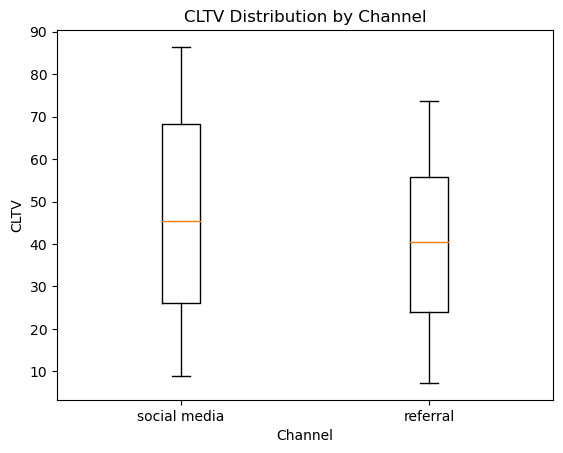

In [19]:
df['CLTV'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']
channel_cltv = df.groupby('channel')['CLTV'].mean()

subset = df.loc[df['channel'].isin(['social media', 'referral'])]

# generate subplots
fig, ax = plt.subplots()

data = [subset.loc[subset['channel'] == 'social media']['CLTV'],
        subset.loc[subset['channel'] == 'referral']['CLTV']]

# make the boxplot
ax.boxplot(data)
ax.set_xticklabels(['social media', 'referral'])
ax.set_title('CLTV Distribution by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('CLTV')

plt.show()


The Customer Lifetime Value via the Social Media route is marginally higher than the referral channel, albeit there is not much of a difference.